In [76]:
import os
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'font.size': 18})

In [77]:
datadir = "../data/dineof/"
datafile = os.path.join(datadir, "ColloquiumTYX2.nc")
resultdir = "/home/ctroupin/Software/dineof-3.0/Colloquium/output04/"
resultfile = os.path.join(resultdir, "ColloquiumResults.nc")
figdir = "../figures/dineof/"
figname = os.path.join(figdir, "participants_timeseries_noise.png")

In [78]:
if os.path.exists(datafile):
    with netCDF4.Dataset(datafile, "r") as nc:
        participants0 = nc.variables["participant"][:].mean(axis=2).mean(axis=1)
        years = nc.variables["year"][:]

if os.path.exists(resultfile):
    with netCDF4.Dataset(resultfile, "r") as nc:
        participants1 = nc.variables["participants_filled_01"][:].mean(axis=2).mean(axis=1)
        participants2 = nc.variables["participants_filled_02"][:].mean(axis=2).mean(axis=1)
        participants3 = nc.variables["participants_filled_03"][:].mean(axis=2).mean(axis=1)
        participants4 = nc.variables["participants_filled_04"][:].mean(axis=2).mean(axis=1)

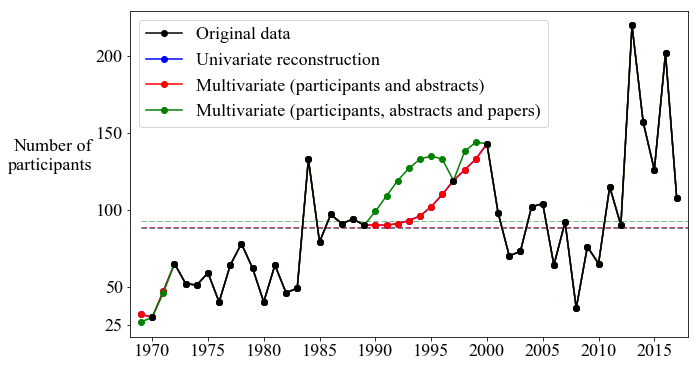

In [75]:
fig = plt.figure(figsize=(10, 6))
plt.plot(years, participants0, 'ko-', zorder=5, label="Original data")
plt.plot(years, participants1.round(), 'bo-', label="Univariate reconstruction")
plt.plot(years, participants2.round(), 'ro-', label="Multivariate (participants and abstracts)")
plt.plot(years, participants3.round(), 'go-', label="Multivariate (participants, abstracts and papers)")

plt.hlines(participants0.mean(), 1969, 2018, colors='k', linestyles='--', linewidth=.5)
plt.hlines(participants1.mean(), 1969, 2018, colors='b', linestyles='--', linewidth=.5)
plt.hlines(participants2.mean(), 1969, 2018, colors='r', linestyles='--', linewidth=.5)
plt.hlines(participants3.mean(), 1969, 2018, colors='g', linestyles='--', linewidth=.5)


# plt.plot(years, participants4.round(), 'yo-', label="Original data")
plt.ylabel("Number of\nparticipants", rotation=0, ha="right")
plt.yticks([25, 50, 100, 150, 200])
plt.xticks(range(1965, 2018, 5))
plt.xlim(1968, 2018)
plt.legend()
plt.savefig(figname, dpi=300, bbox_inches="tight")
plt.show()
plt.close()

# Write to new file